In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

# 데이터 확인

|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|나이|직업|결혼|교육|신용카드|주택|대출|연락처|마지막 연락 월|마지막 연락 요일|통화시간|캠페인 기간동안 고객연락횟수|이전 캠페인 연락 후 지난일|  

|previous|poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr,employed|y|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|현재 캠페인 전에 연락횟수|이전 마케팅 결과|고용 변동률|소비자 물가 지수|소비자 신뢰 지수|유리보 3개월 비율|직원수|정기예금 가입여부|

In [2]:
df = pd.read_csv('./data/bank.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### 기본 정보 확인

In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- 클래스 불균형으로 보기엔 애매한 부분이 있다

In [22]:
print('가입 비율 : ', df['y'].value_counts()[1] / df['y'].count()*100)

df['y'].value_counts()

가입 비율 :  11.265417111780131


no     36548
yes     4640
Name: y, dtype: int64

In [7]:
# 결측치 확인 : 결측치는 없는데 'unknown'이 있음
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 숫자형/문자형 변수 확인

In [40]:
num_list, str_list = [], []

for i in df.columns:
    if df[i].dtypes == 'O':
        str_list.append(i)
    else:
        num_list.append(i)

In [62]:
print(str_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [63]:
print(num_list)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


#### 연속형/범주형 변수 확인
- 숫자형 변수라고 해서 반드시 연속형 변수는 아니다.

In [21]:
# 연속형/범주형 변수 확인
for i in df.columns:
    print(f'{i} : ', len(df[i].unique()))

age :  78
job :  12
marital :  4
education :  8
default :  3
housing :  3
loan :  3
contact :  2
month :  10
day_of_week :  5
duration :  1544
campaign :  42
pdays :  27
previous :  8
poutcome :  3
emp.var.rate :  10
cons.price.idx :  26
cons.conf.idx :  26
euribor3m :  316
nr.employed :  11
y :  2


#### 치우침 확인

In [16]:
abs(df.skew()).sort_values(ascending=False)

pdays             4.922190
campaign          4.762507
previous          3.832042
duration          3.263141
nr.employed       1.044262
age               0.784697
emp.var.rate      0.724096
euribor3m         0.709188
cons.conf.idx     0.303180
cons.price.idx    0.230888
dtype: float64

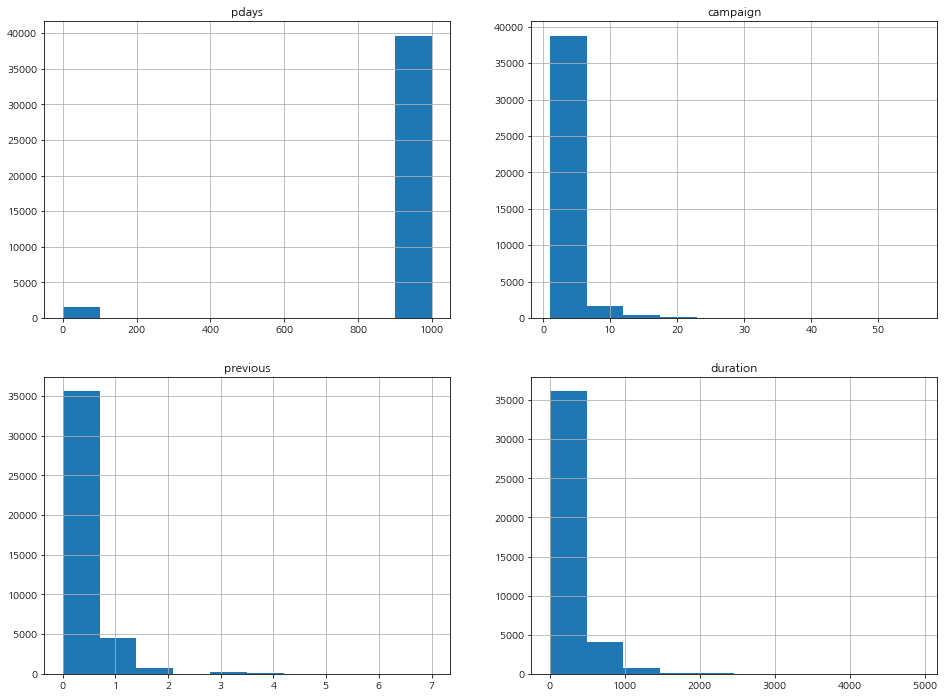

In [26]:
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.title('pdays')
df['pdays'].hist()

plt.subplot(222)
plt.title('campaign')
df['campaign'].hist()

plt.subplot(223)
plt.title('previous')
df['previous'].hist()

plt.subplot(224)
plt.title('duration')
df['duration'].hist()

plt.show()

#### 이상치 확인

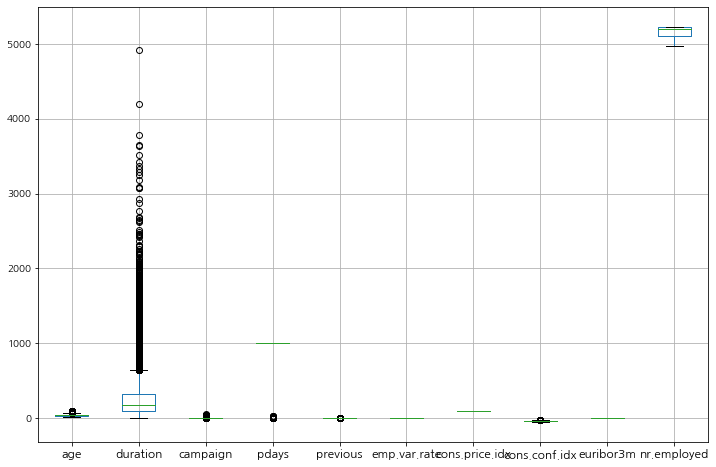

In [67]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(fontsize=12)
plt.show()

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

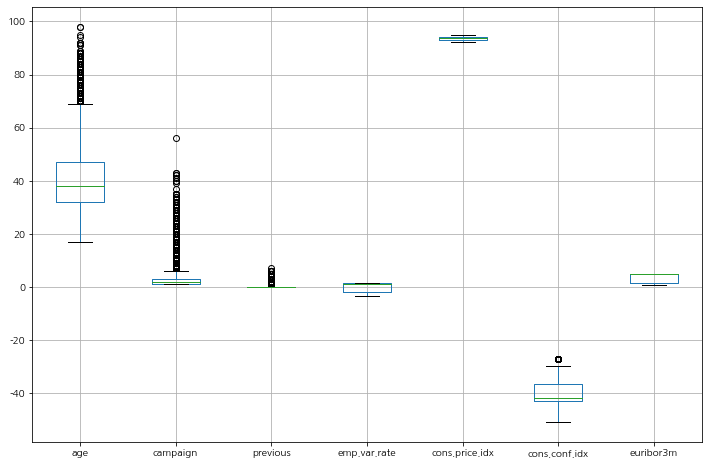

In [34]:
plt.figure(figsize=(12, 8))
df[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].boxplot()
plt.show()

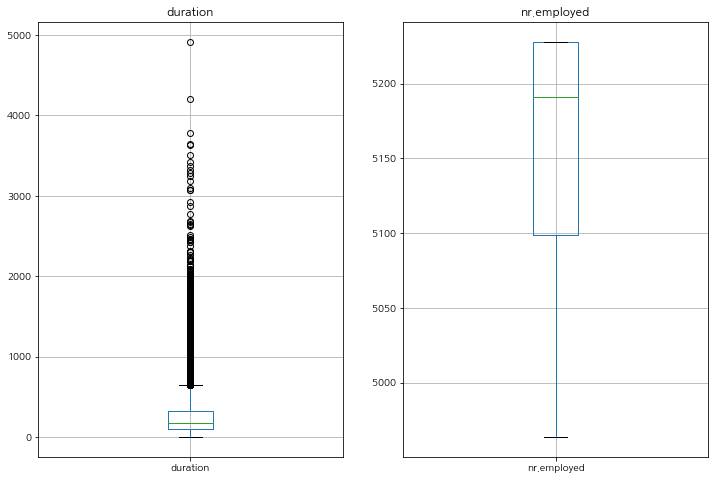

In [38]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
df[['duration']].boxplot()
plt.title('duration')

plt.subplot(122)
df[['nr.employed']].boxplot()
plt.title('nr.employed')

plt.show()

#### 가입/비가입 비교

In [52]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

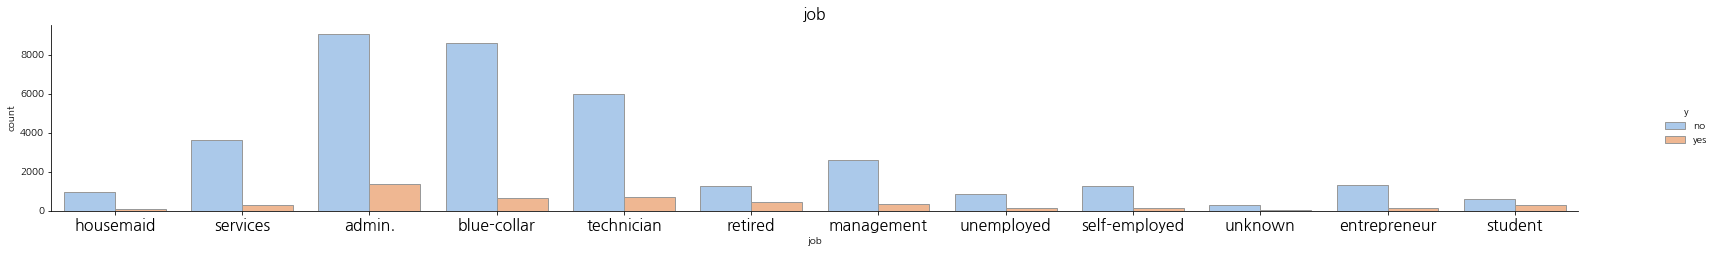

In [61]:
sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('job', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)
plt.show()

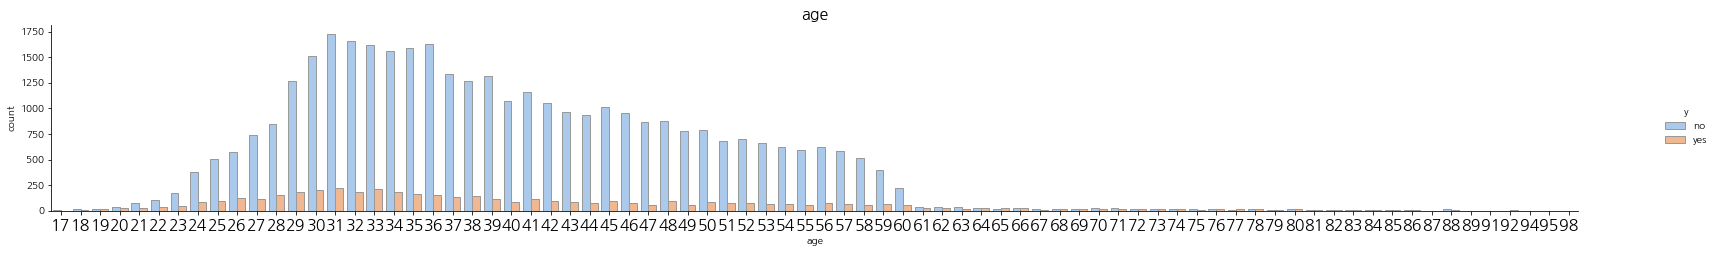

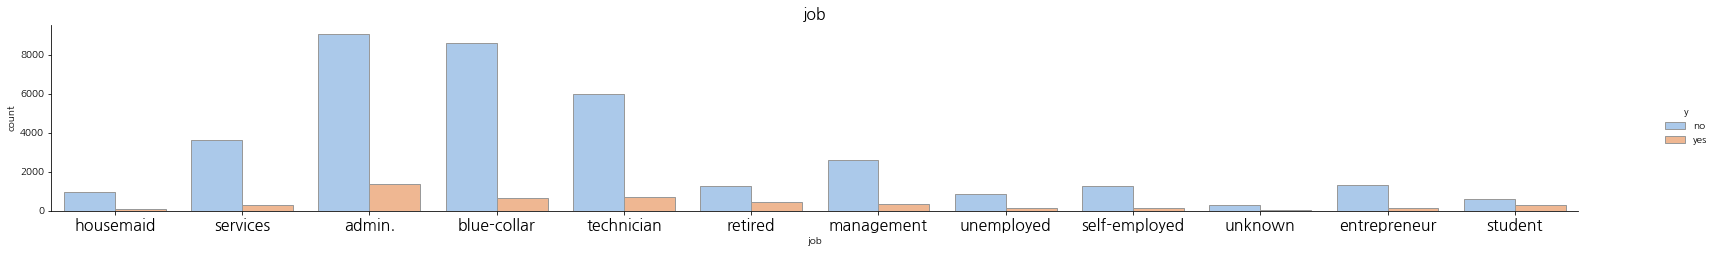

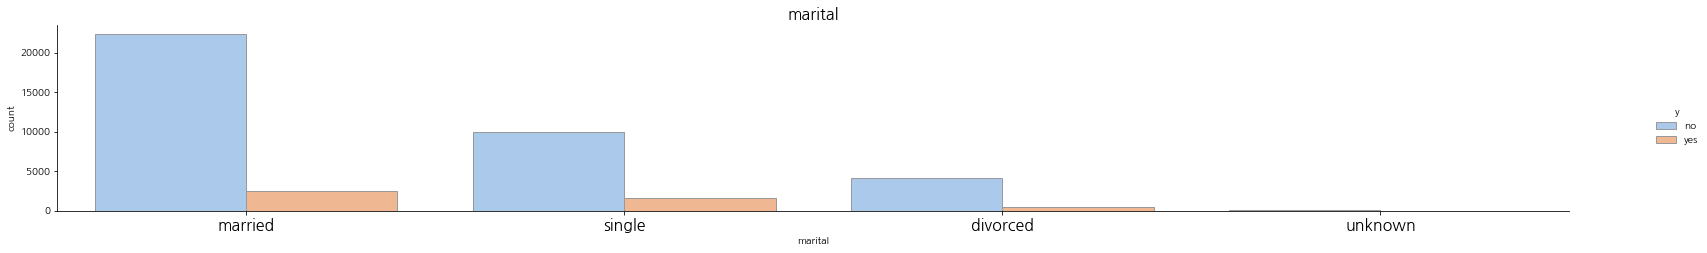

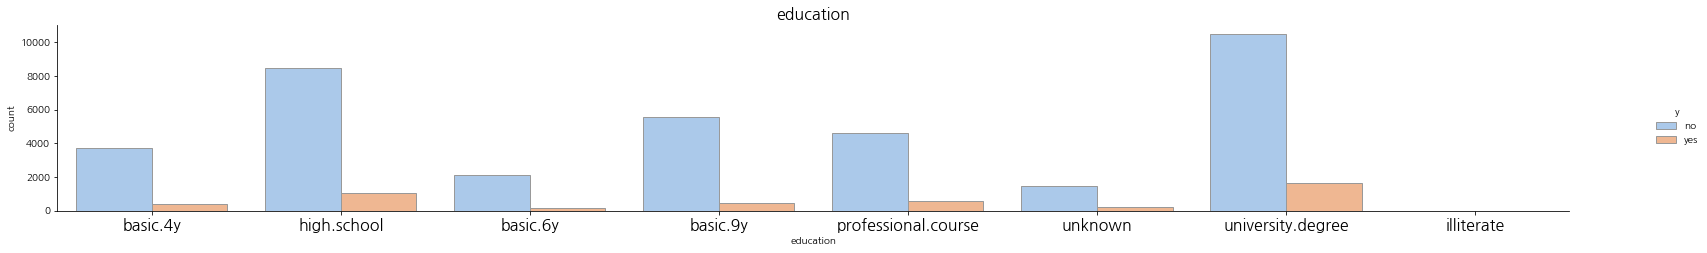

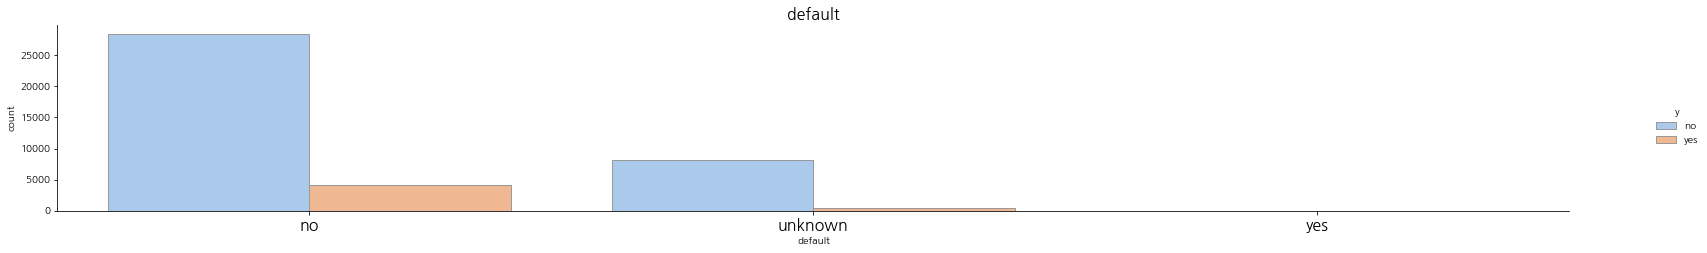

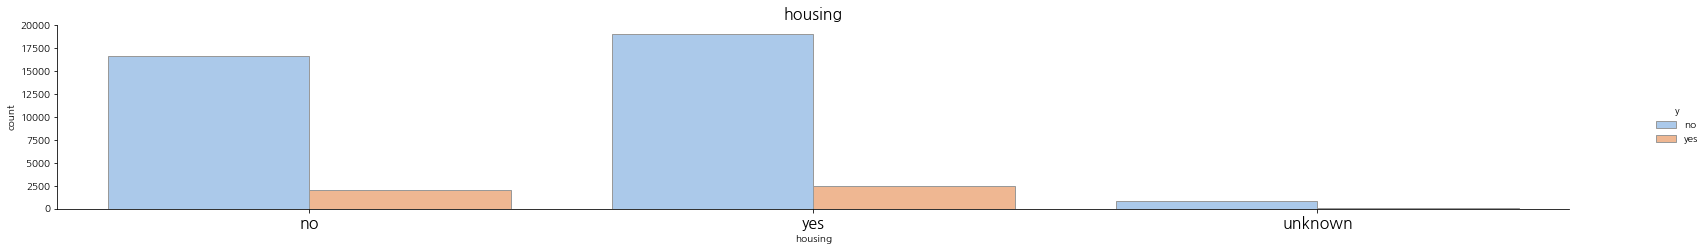

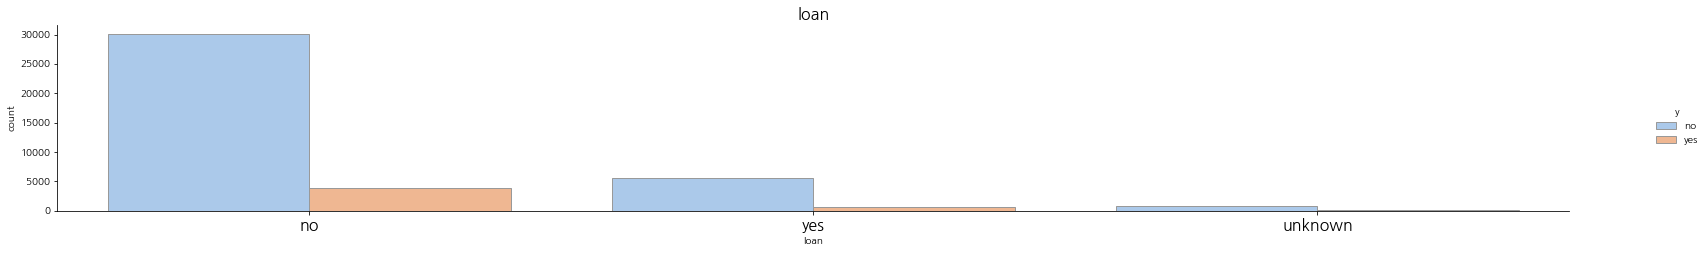

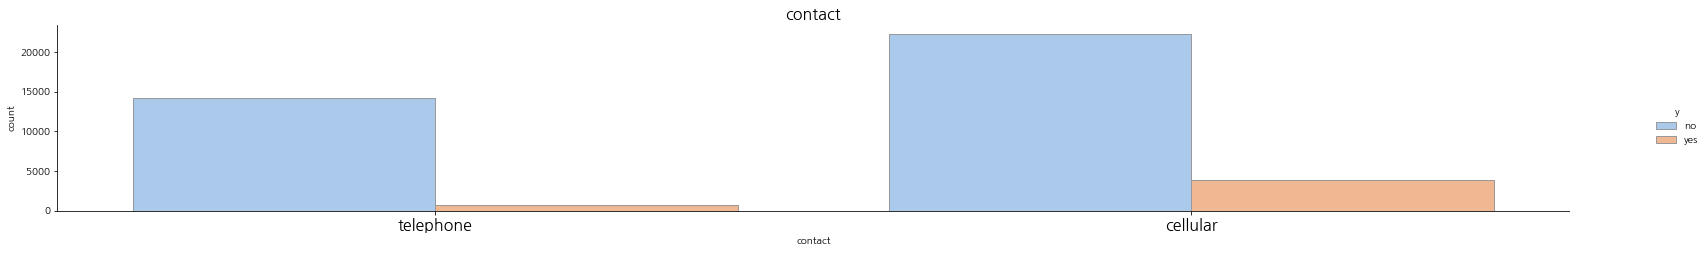

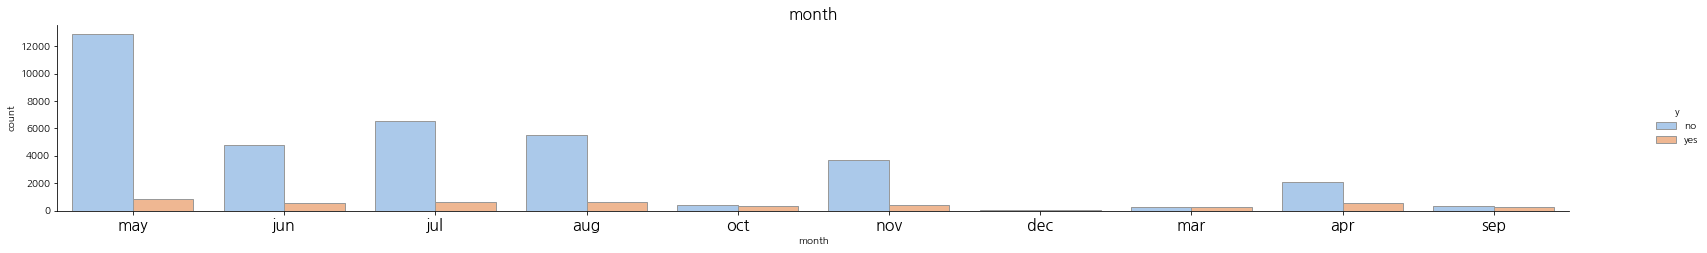

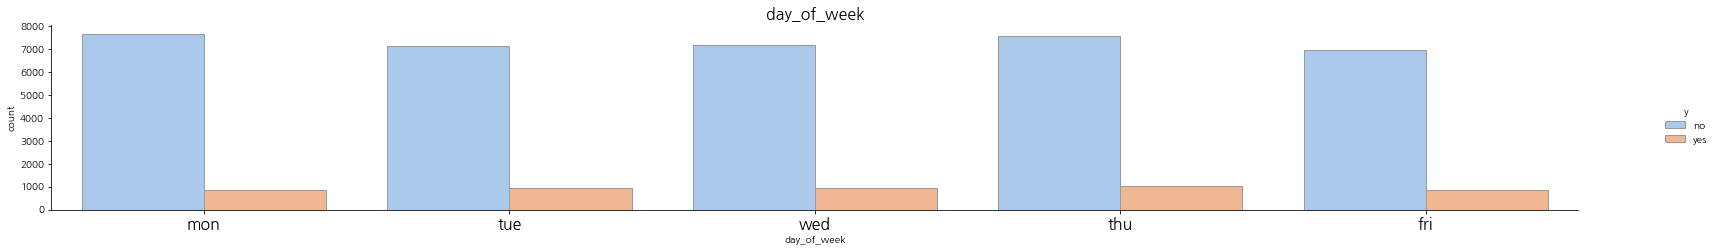

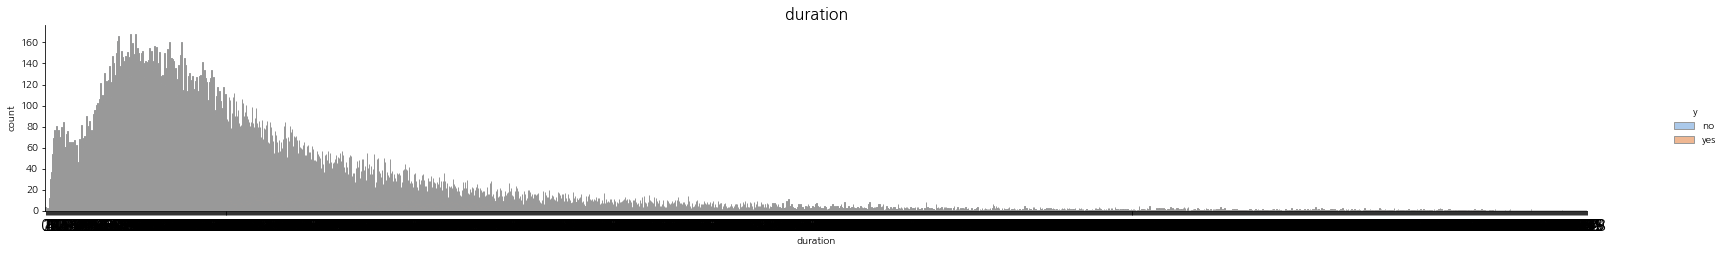

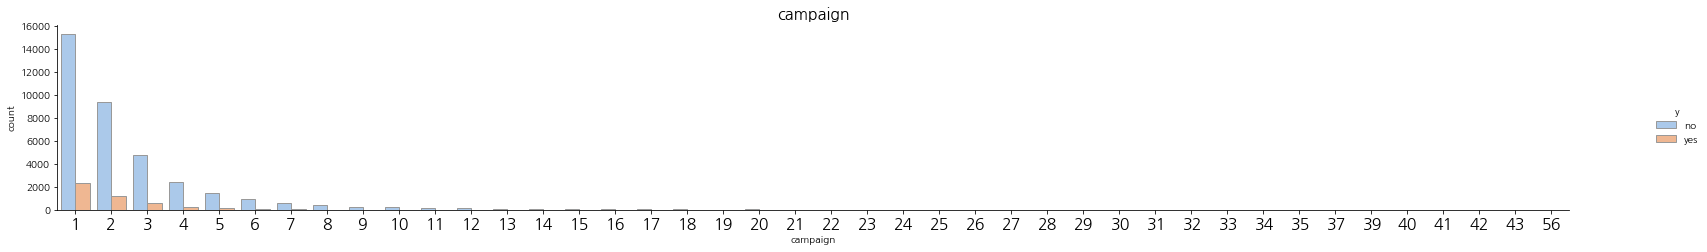

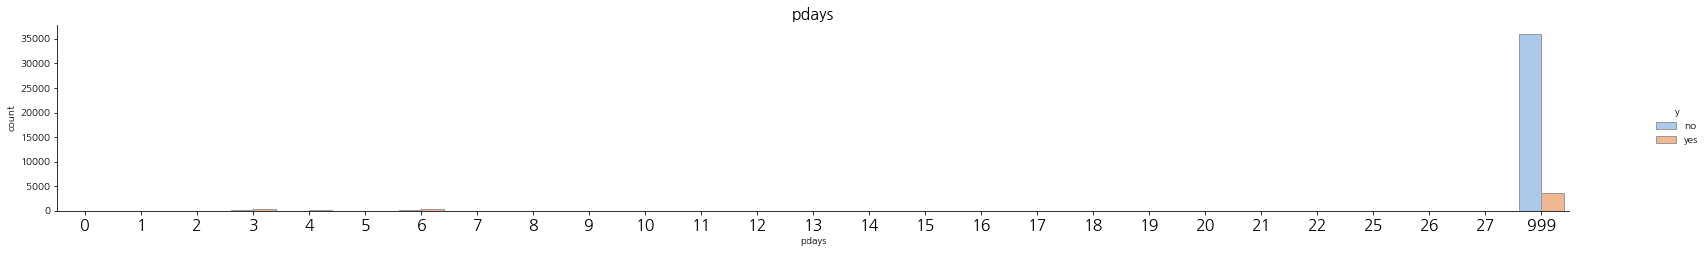

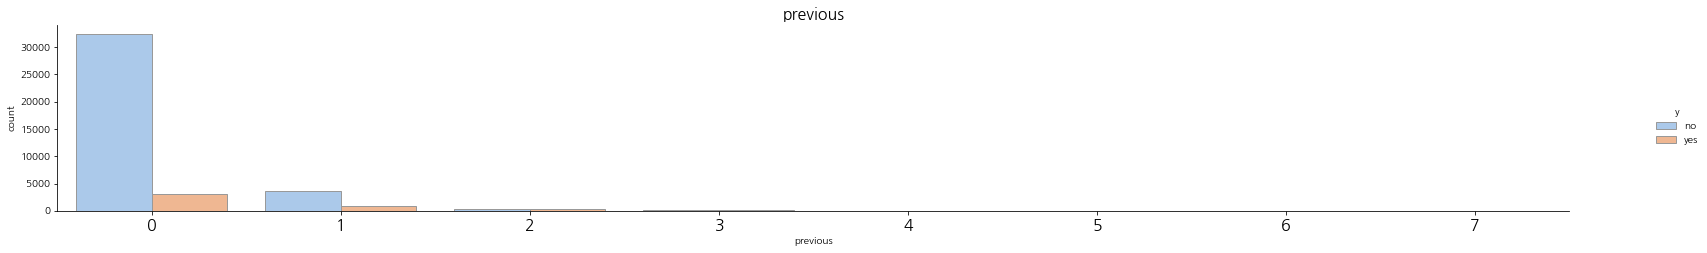

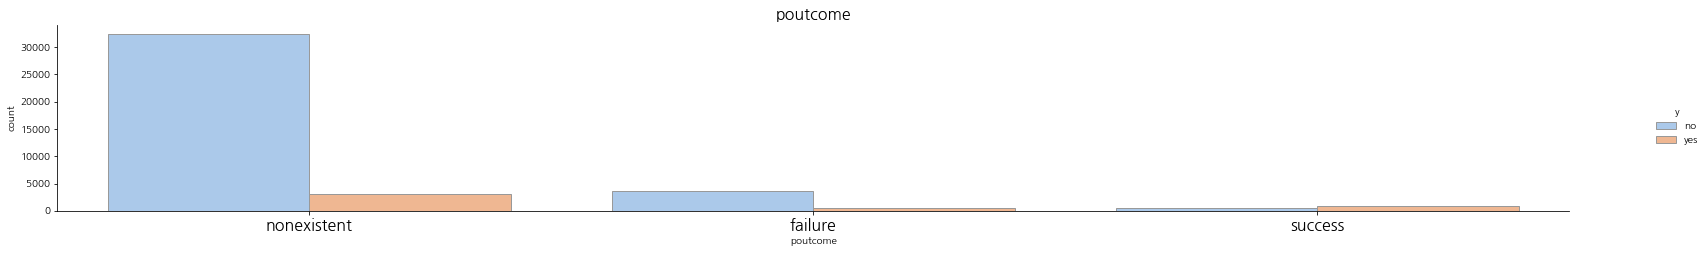

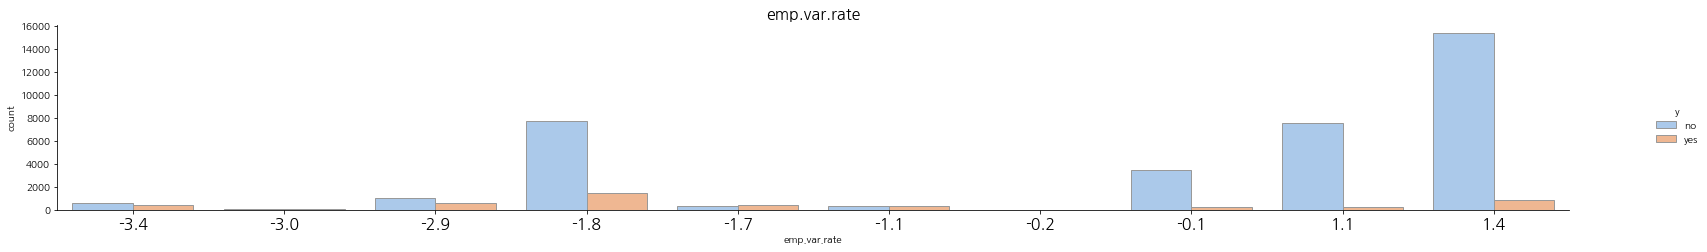

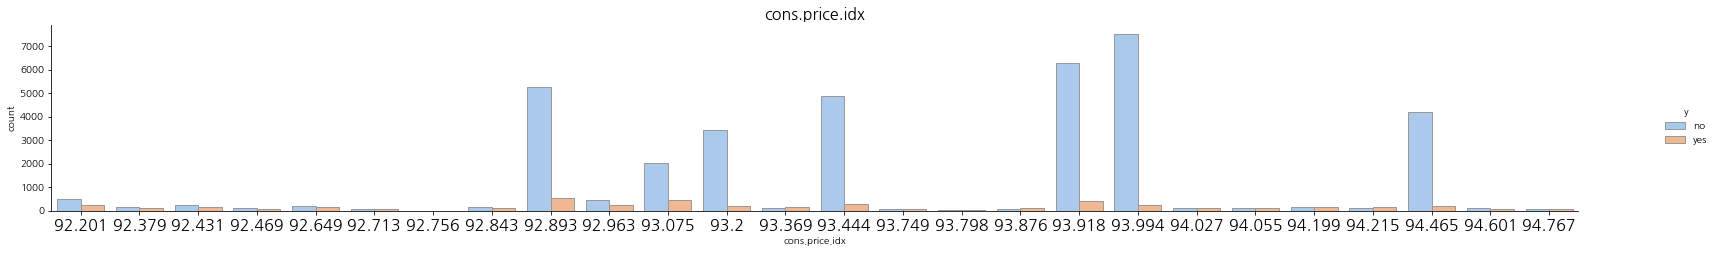

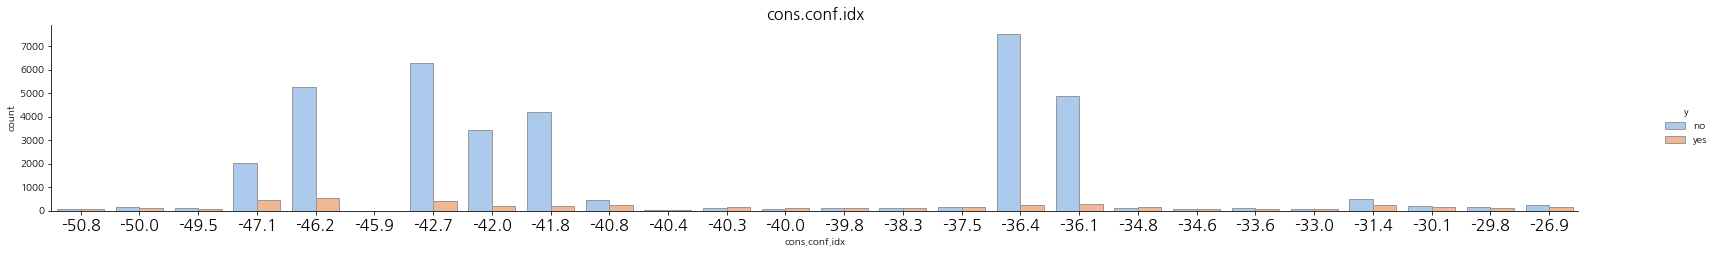

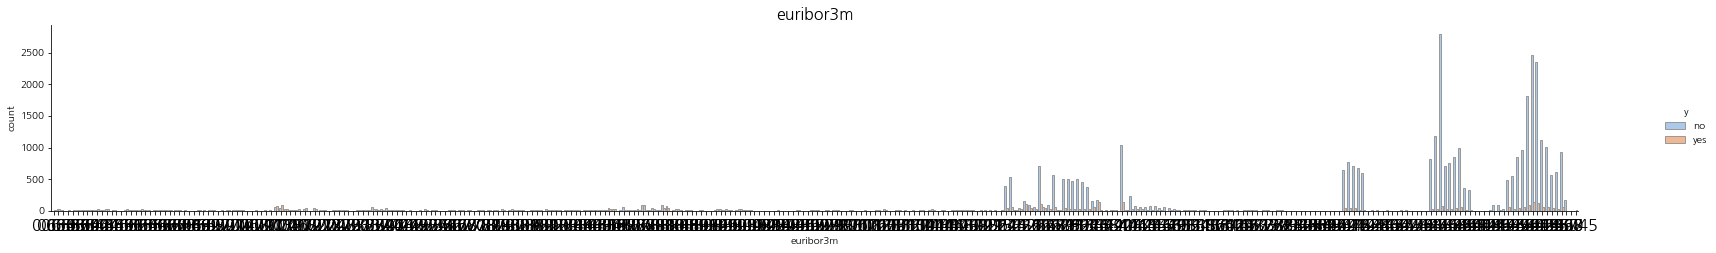

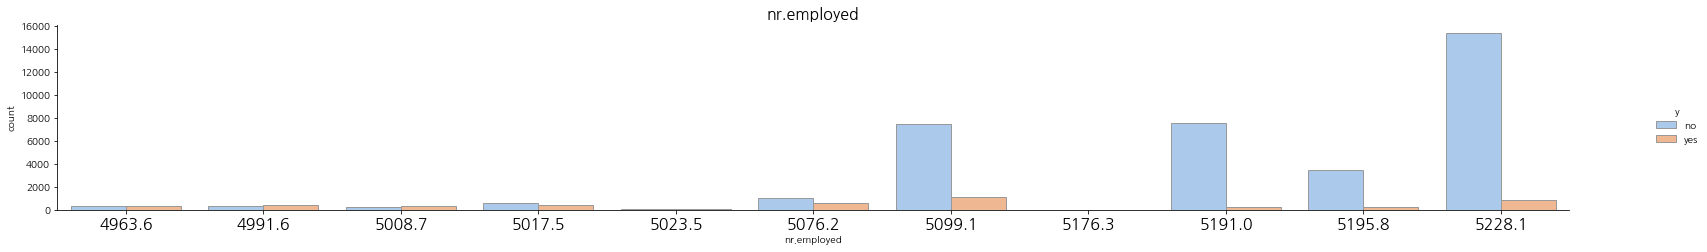

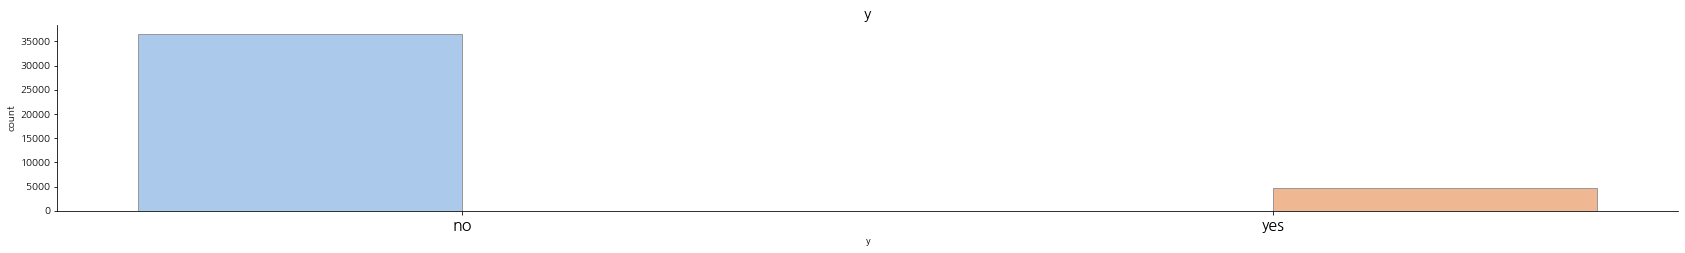

In [60]:
for i in df.columns:
    sns.catplot(x=f"{i}", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
    plt.title(f'{i}', fontsize=16)
    plt.gcf().set_size_inches(25, 3)
    plt.xticks(fontsize=16)
plt.show()

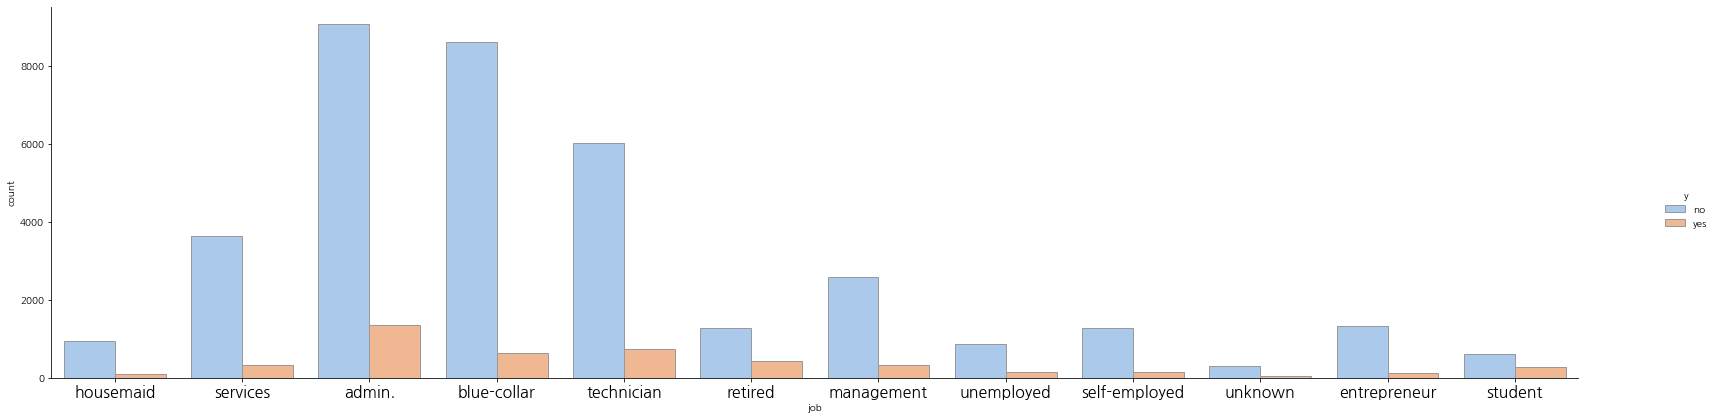

In [55]:
sns.catplot(data=df, x='job', hue='y', kind='count', palette='pastel', edgecolor='.6', aspect=2)
plt.gcf().set_size_inches(25, 6)
plt.xticks(fontsize=16)
plt.show()

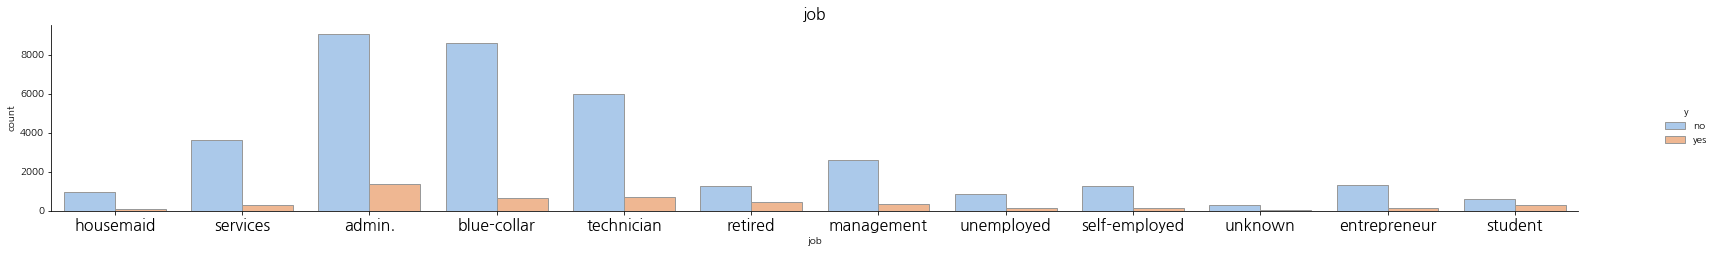

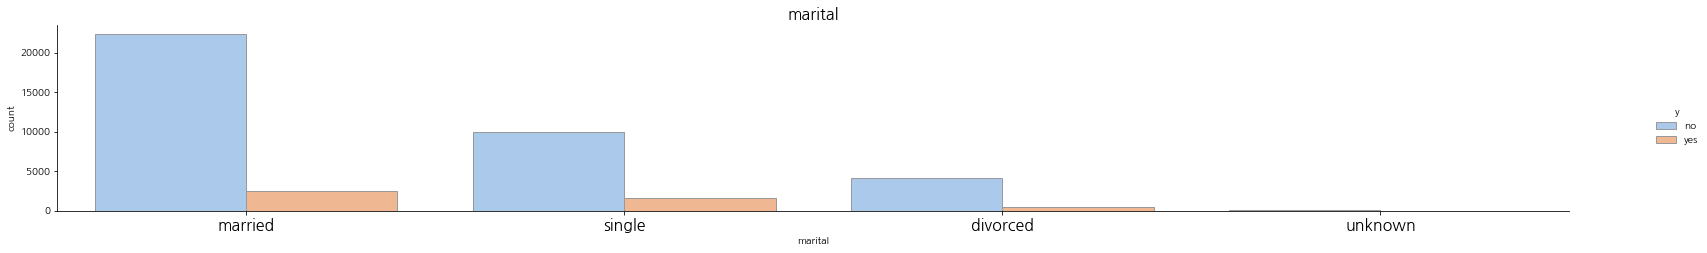

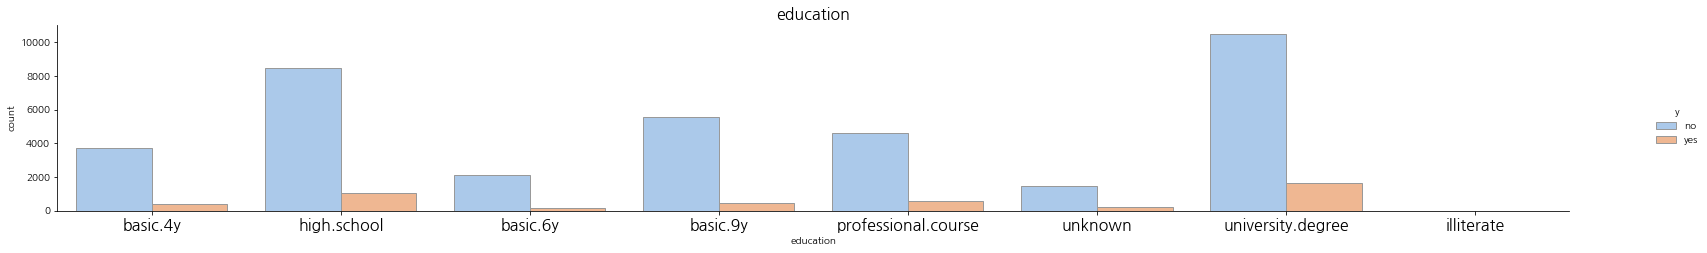

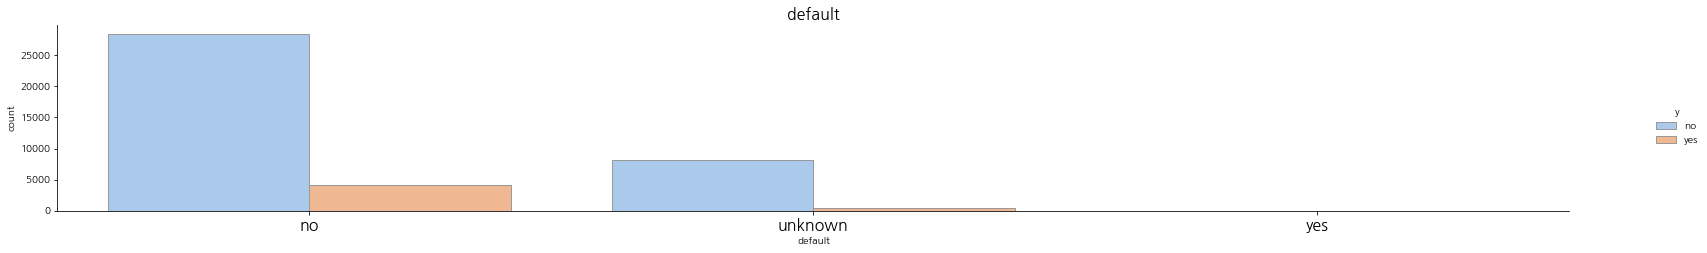

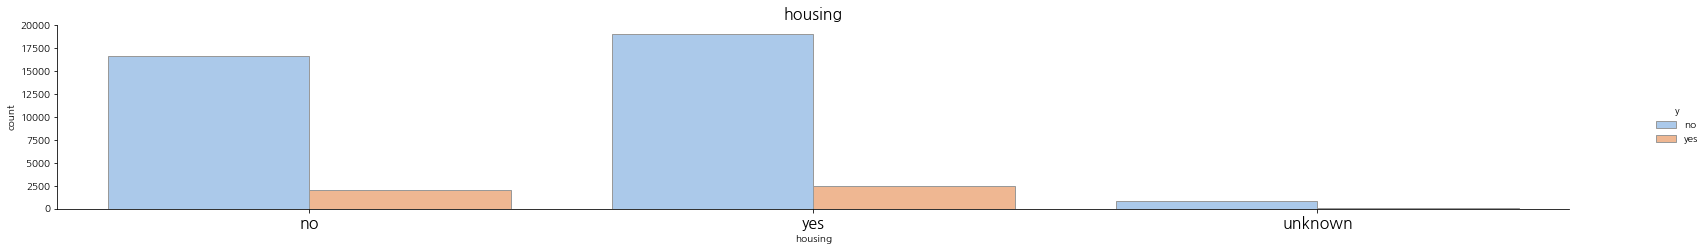

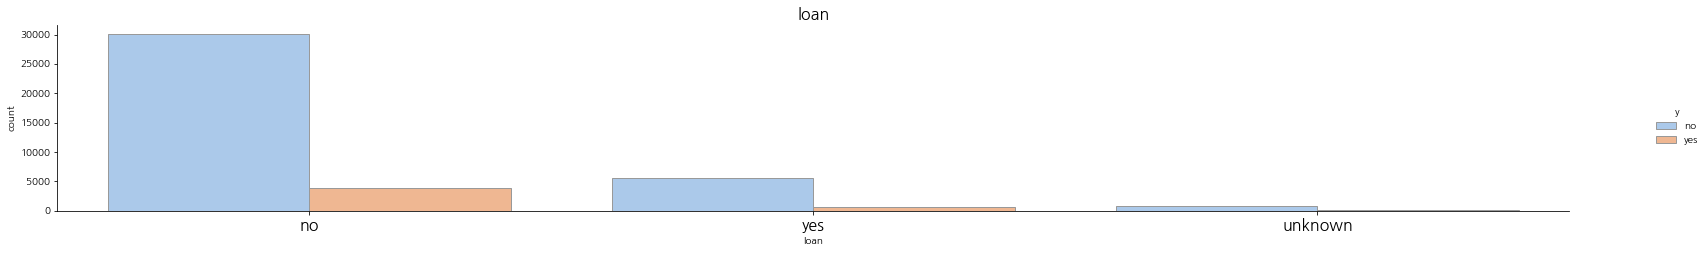

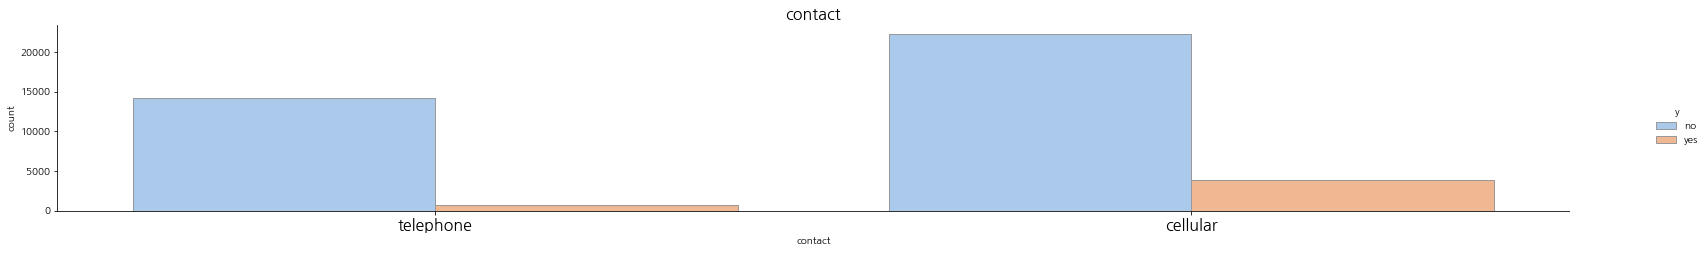

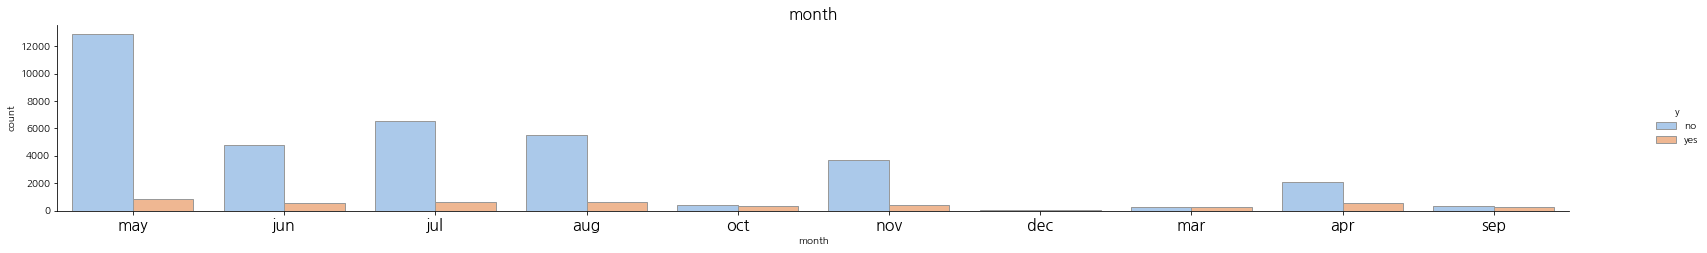

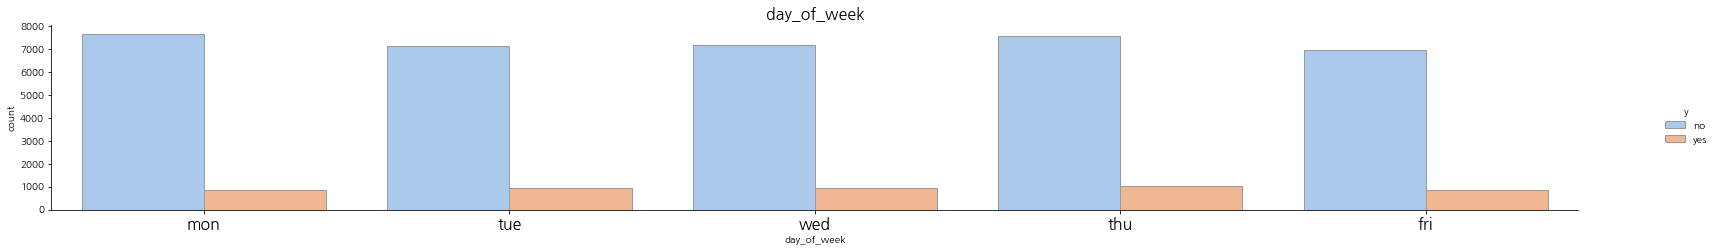

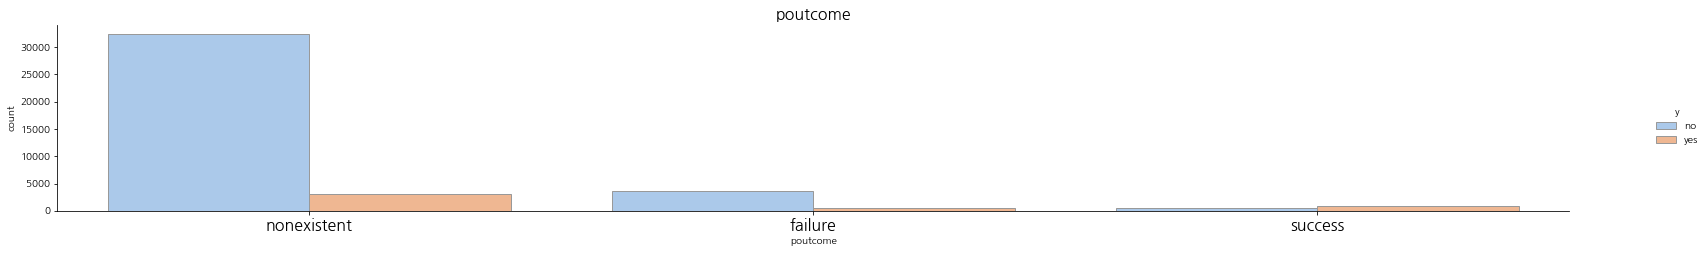

In [58]:
# ▶ catplot을 활용하여 Categorical 변수의 구성형태와 정기예금 가입 상황을 한눈에 살펴봄

sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('job', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="marital", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('marital', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="education", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('education', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="default", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('default', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="housing", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('housing', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="loan", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('loan', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="contact", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('contact', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="month", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('month', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="day_of_week", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('day_of_week', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="poutcome", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=2)
plt.title('poutcome', fontsize=16)
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

plt.show()

#### 데이터 기반 가입률 비교 및 예측
- 앞서 확인한 분석을 바탕으로 좀 더 자세하게

- 직업별

In [77]:
df_job = df.groupby(['job', 'y'], as_index=False)['age'].count().rename(columns={'age':'count'})
df_job = pd.pivot_table(df_job, index='job', columns='y', values='count').reset_index()
df_job

y,job,no,yes
0,admin.,9070,1352
1,blue-collar,8616,638
2,entrepreneur,1332,124
3,housemaid,954,106
4,management,2596,328
5,retired,1286,434
6,self-employed,1272,149
7,services,3646,323
8,student,600,275
9,technician,6013,730


In [80]:
df_job['sign_ratio'] = round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100, 1)

df_job

y,job,no,yes,sign_ratio
0,admin.,9070,1352,13.0
1,blue-collar,8616,638,6.9
2,entrepreneur,1332,124,8.5
3,housemaid,954,106,10.0
4,management,2596,328,11.2
5,retired,1286,434,25.2
6,self-employed,1272,149,10.5
7,services,3646,323,8.1
8,student,600,275,31.4
9,technician,6013,730,10.8


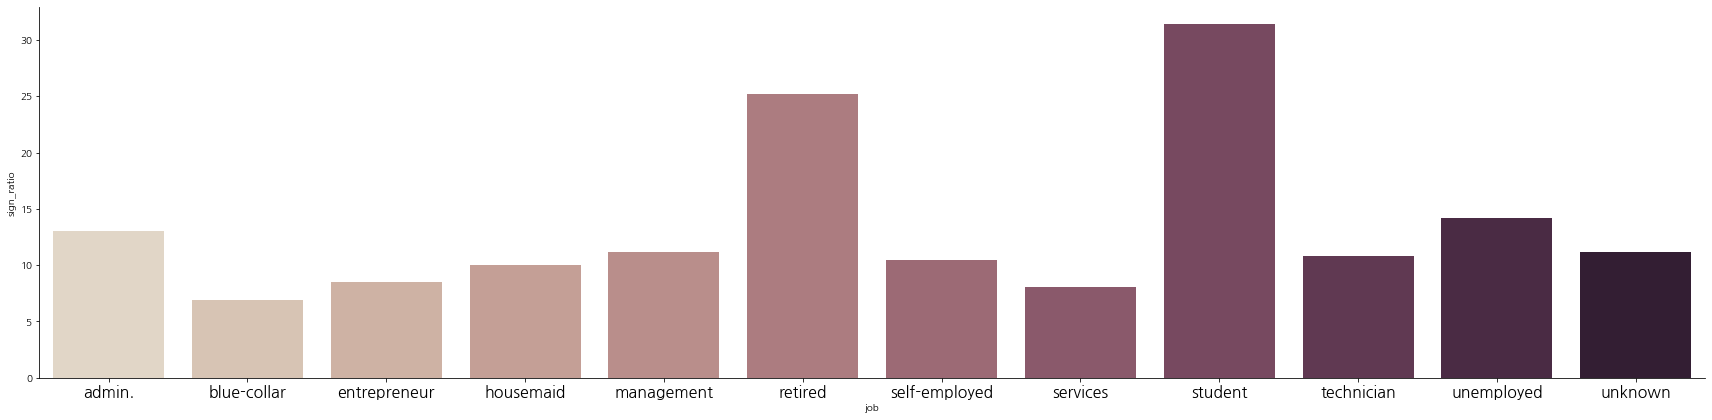

In [86]:
sns.catplot(data=df_job, x='job', y='sign_ratio', kind='bar',  palette='ch:.25', aspect=2)
plt.gcf().set_size_inches(25, 6)
plt.xticks(fontsize=16)
plt.show()

In [87]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

- 결혼 유무

In [88]:
df_marital = df.groupby(['marital', 'y'], as_index=False)['age'].count().rename(columns={'age':'count'})
df_marital = pd.pivot_table(df_marital, index='marital', columns='y', values='count').reset_index()
df_marital['sign_ratio'] = round((df_marital['yes'] / (df_marital['yes'] + df_marital['no'])) * 100, 1)
df_marital


y,marital,no,yes,sign_ratio
0,divorced,4136,476,10.3
1,married,22396,2532,10.2
2,single,9948,1620,14.0
3,unknown,68,12,15.0


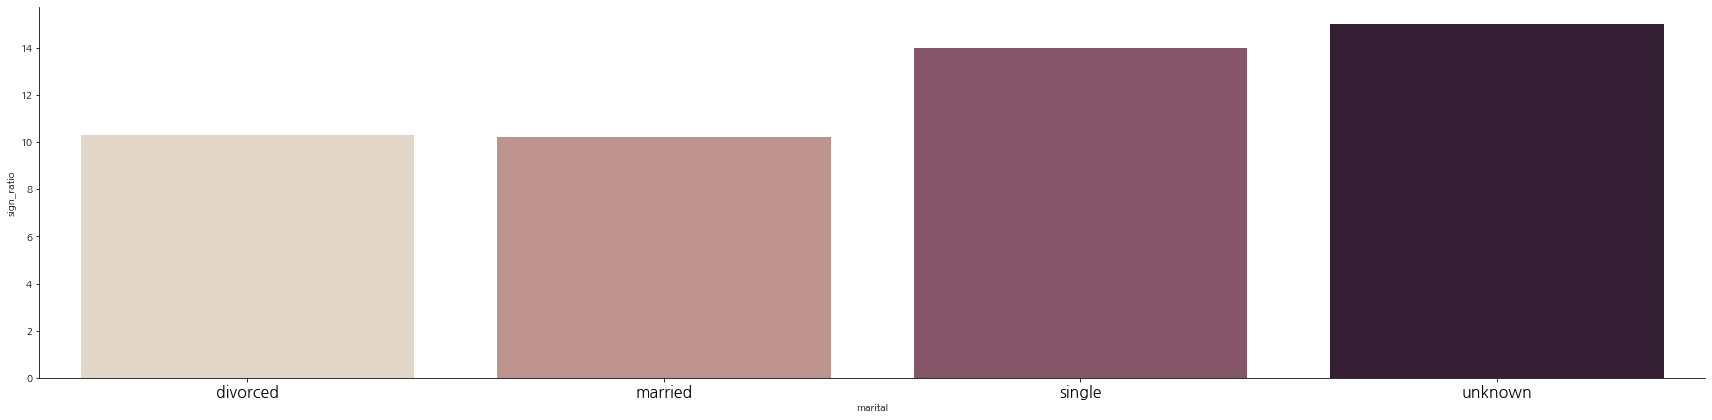

In [89]:
sns.catplot(data=df_marital, x='marital', y='sign_ratio', kind='bar',  palette='ch:.25', aspect=2)
plt.gcf().set_size_inches(25, 6)
plt.xticks(fontsize=16)
plt.show()

- education

In [90]:
df_education = df.groupby(['education', 'y'], as_index=False)['age'].count().rename(columns={'age':'count'})
df_education = pd.pivot_table(df_education, index='education', columns='y', values='count').reset_index()
df_education['sign_ratio'] = round((df_education['yes'] / (df_education['yes'] + df_education['no'])) * 100, 1)
df_education


y,education,no,yes,sign_ratio
0,basic.4y,3748,428,10.2
1,basic.6y,2104,188,8.2
2,basic.9y,5572,473,7.8
3,high.school,8484,1031,10.8
4,illiterate,14,4,22.2
5,professional.course,4648,595,11.3
6,university.degree,10498,1670,13.7
7,unknown,1480,251,14.5


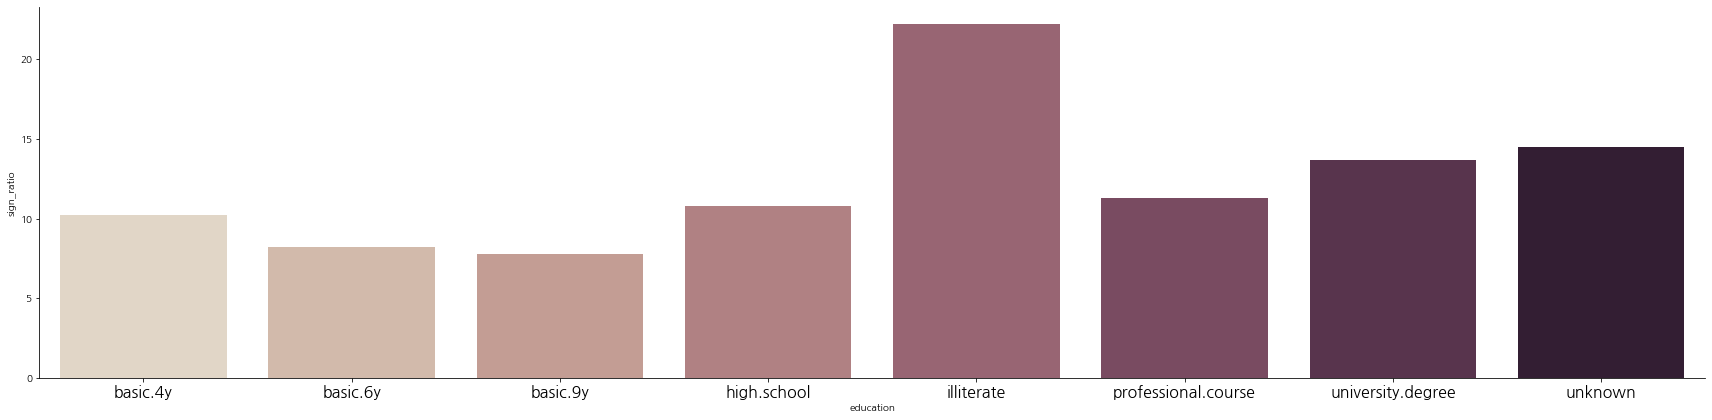

In [91]:
sns.catplot(data=df_education, x='education', y='sign_ratio', kind='bar',  palette='ch:.25', aspect=2)
plt.gcf().set_size_inches(25, 6)
plt.xticks(fontsize=16)
plt.show()

In [102]:
pd.Series(df['age'].unique()).sort_values()

69    17
43    18
42    19
39    20
40    21
      ..
71    91
76    92
74    94
50    95
73    98
Length: 78, dtype: int64

- poutcome

In [103]:
df_poutcome = df.groupby(['poutcome', 'y'], as_index=False)['age'].count().rename(columns={'age':'count'})
df_poutcome = pd.pivot_table(df_poutcome, index='poutcome', columns='y', values='count').reset_index()
df_poutcome['sign_ratio'] = round((df_poutcome['yes'] / (df_poutcome['yes'] + df_poutcome['no'])) * 100, 1)
df_poutcome

y,poutcome,no,yes,sign_ratio
0,failure,3647,605,14.2
1,nonexistent,32422,3141,8.8
2,success,479,894,65.1


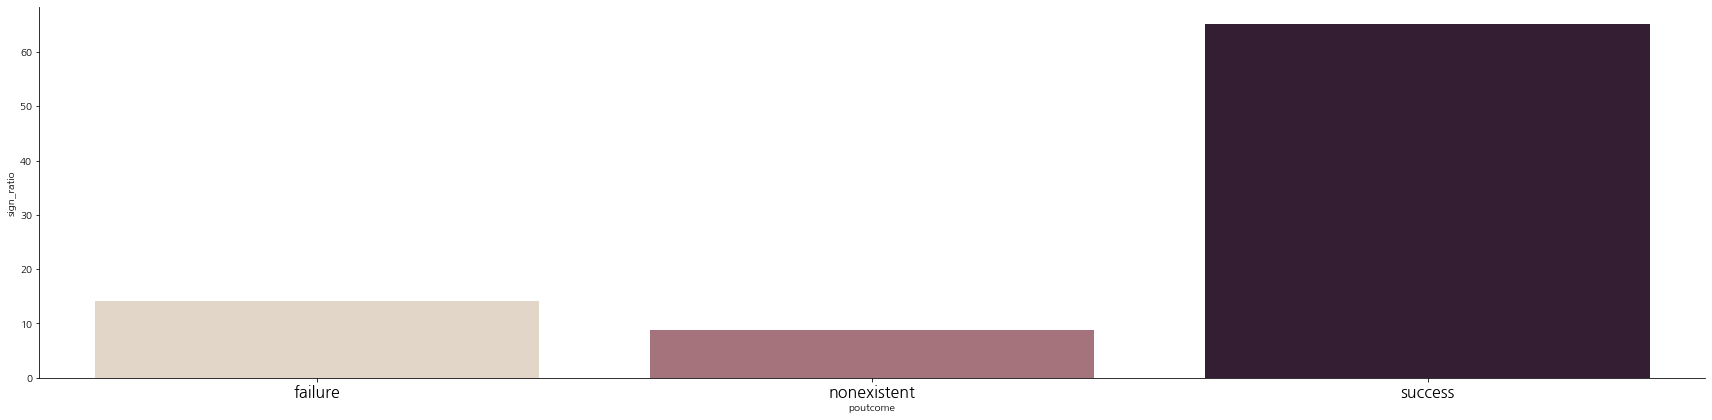

In [104]:
sns.catplot(data=df_poutcome, x='poutcome', y='sign_ratio', kind='bar',  palette='ch:.25', aspect=2)
plt.gcf().set_size_inches(25, 6)
plt.xticks(fontsize=16)
plt.show()

### 카테고리별 가입 비율

In [134]:
str_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [141]:
i = 'month'

# 1단계 
df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

# 2단계
df_gp = pd.pivot_table(df_gp,              # 피벗할 데이터프레임
                        index = i,         # 행 위치에 들어갈 열
                        columns = 'y',     # 열 위치에 들어갈 열
                        values = 'cnt')    # 데이터로 사용할 열 

# 3단계
df_gp = df_gp.reset_index()

# 4단계
df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,month,no,yes,sign_ratio
5,mar,270,276,50.5
2,dec,93,89,48.9
9,sep,314,256,44.9
8,oct,403,315,43.9
0,apr,2093,539,20.5
1,aug,5523,655,10.6
4,jun,4759,559,10.5
7,nov,3685,416,10.1
3,jul,6525,649,9.0
6,may,12883,886,6.4


In [123]:
df_dict = {}

for i in str_list[:-1]:
    print(i)
    tmp = df.groupby([f'{i}', 'y'], as_index=False)['age'].count().rename(columns={'age':'count'})
    tmp = pd.pivot_table(tmp, index=f'{i}', columns='y', values='count').reset_index()
    tmp['sign_ratio'] = round((tmp['yes'] / (tmp['yes'] + tmp['no'])) * 100, 1)
    df_dict[i] = tmp.sort_values(by='sign_ratio', ascending=False).iloc[0, :].values[0]

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [125]:
df_dict['job']

'student'

In [137]:
best_ratio = df[
                (df['job'] == df_dict['job']) |
                # (df['marital'] == df_dict['marital']) |
                # (df['education'] == df_dict['education']) |
                # (df['default'] == df_dict['default']) |
                # (df['housing'] == df_dict['housing']) |
                # (df['loan'] == df_dict['loan']) |
                (df['contact'] == df_dict['contact']) |
                (df['month'] == df_dict['month']) |
                (df['day_of_week'] == df_dict['day_of_week']) |
                (df['poutcome'] == df_dict['poutcome'])
]

In [138]:
best_ratio['y'].value_counts()

no     25143
yes     4091
Name: y, dtype: int64

In [139]:
# 약 14% 정도
best_ratio['y'].value_counts()[1] / best_ratio['y'].value_counts().sum()

0.1399397961277964

# 모델링

In [142]:
# 라벨 데이터 수치형으로 변환
df['y']=np.where(df['y']=='yes', 1, 0)
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64